In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialization parameters

premovietime = 21
movietime = 420
postmovietime = 15
totaltime = premovietime + movietime + postmovietime

In [22]:
RespirationTS = []
for runidx in range(3):
    if runidx == 0:
        runID = 'A'
        BreathingPhase = 0
    elif runidx == 1:
        runID = 'B'
        BreathingPhase = np.pi
    elif runidx == 2:
        runID = 'C'
        BreathingPhase = np.pi/2

    # CREATE BREATHING PATTERNS
    # =============================
    amp = 0.1 # amplitude of the carrier frequency
    AMamp = 0.05 # Amplitude of the AM (depth) modulation
    meanshift = 0.11 # The mean circle diameter should always be positive
    # Due to frame rate differences and rounding, the final time point might be a few frames past the end of BreathingPattern
    #   add an extra second to make sure the script never gets past the last value
    TimingFudge = 1 
    FC = 1/5 # Averaging 5s breathing cycles
    FM = 1/60 # Breathing frequency modulates over 60s cycles
    FCscale = (2*FC*np.pi)
    FMscale = (2*FM*np.pi)
    FreqDev = FC-1/6 # Frequency deviation between 2s and 3s breathing cycles
    ModFreq = FreqDev/FM
    # Time in seconds spaced in 0.1 second intervals
    # NOTE: I realized that I messed up these 0.1 second intervals in linspace so it's actually
    #   about 0.10002188662727074 second intervals. For the sake of the script and stimulus presentation
    #   this is essentially meaningless. Since several participants are collected with this
    #   I'm not changing now, but it's worth noting.
    TimeInSec = np.round(np.linspace(0,totaltime+TimingFudge,num=(totaltime+TimingFudge)*10+1), decimals=5)
    AMmod = -AMamp*np.cos(2*np.pi*TimeInSec*FM+BreathingPhase)+0.2
    BreathingPattern = AMmod*np.sin(2*np.pi*FC*TimeInSec + ModFreq*np.sin(2*np.pi*FM*TimeInSec+BreathingPhase)+BreathingPhase)*amp+meanshift
    RespirationTS.append(pd.DataFrame({'Sec': TimeInSec, 'RespSize': BreathingPattern}))


<Figure size 432x288 with 0 Axes>

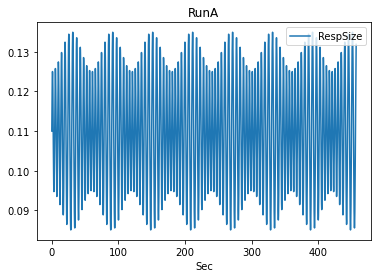

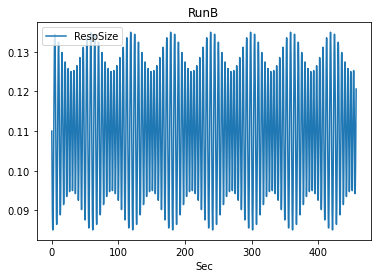

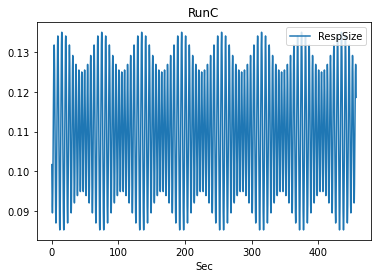

In [23]:
RunLetters = ('A', 'B', 'C')
plt.clf()
for runidx in range(3):
    RespirationTS[runidx].plot(x='Sec', y='RespSize', title=f"Run{RunLetters[runidx]}")
    RespirationTS[runidx].to_csv(f"IdealBreathingPattern_Run{RunLetters[runidx]}.tsv", sep='\t')

Older stuff while I was still testing things out.

In [3]:
amplitude = [0.01,0.02,0.03];
frequency = [(1.5*np.pi*0.2),(2*np.pi*0.2),(2.5*np.pi*0.2)];
mat1_0,mat1_1,mat1_2 = [(amplitude[0], i) for i in frequency],[(amplitude[1], i) for i in frequency],[(amplitude[2], i) for i in frequency]
mat1 = mat1_0+mat1_1+mat1_2
matrix_run = mat1
resp_pattern = [np.sin(i[1]*np.linspace(0,300,num=3000))*i[0]+0.11 for i in matrix_run]


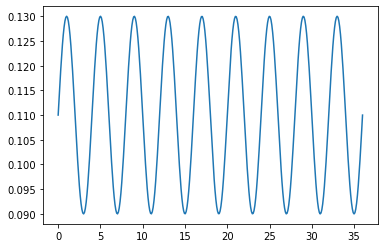

In [3]:
ScanLength = 15+420+15 # in seconds
ScanLength = 36 # in seconds
amp = 0.02
freq = ((2/4)*np.pi)
TimeInSec = np.linspace(0,ScanLength,num=ScanLength*10)
BreathingPattern = np.sin(freq*TimeInSec)*amp+0.11
plt.plot(TimeInSec, BreathingPattern)

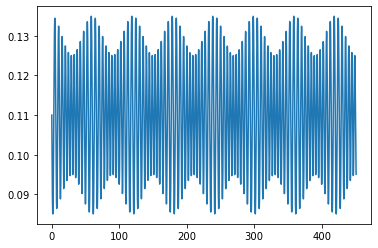

In [82]:
totaltime =15+420+15 # in seconds
# totaltime = 60
amp = 0.1 # amplitude of the carrier frequency
AMamp = 0.05 # Amplitude of the AM (depth) modulation
meanshift = 0.11 # The mean circle diameter should always be positive
# Due to frame rate differences and rounding, the final time point might be a few frames past the end of BreathingPattern
#   add an extra second to make sure the script never gets past the last value
TimingFudge = 1 
FC = 1/5 # Averaging 5s breathing cycles
FM = 1/60 # Breathing frequency modulates over 60s cycles
FCscale = (2*FC*np.pi)
FMscale = (2*FM*np.pi)
FreqDev = FC-1/6 # Frequency deviation between 2s and 3s breathing cycles
ModFreq = FreqDev/FM
PhaseShift = np.pi
# Time in seconds spaced in 0.1 second intervals
TimeInSec = np.linspace(0,totaltime+TimingFudge,num=(totaltime+TimingFudge)*10)
AMmod = -AMamp*np.cos(2*np.pi*TimeInSec*FM+PhaseShift)+0.2
BreathingPattern = AMmod*np.sin(2*np.pi*FC*TimeInSec + ModFreq*np.sin(2*np.pi*FM*TimeInSec+PhaseShift)+PhaseShift)*amp+meanshift
plt.figure()
plt.ion
plt.plot(TimeInSec, BreathingPattern)